# Project 2: Wrangling and Analyze Data

### A propos : 
The dataset submitted to our study comes from Twitter user @dog_rates's tweet archive, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about their dogs. These scores have denominators of 10. and numerators above the denominator because they are good Brent dogs . 
- Normally, for this project, I had to perform an extraction of the tweet data via the Twitter API which I am denied access to. I have therefore used data already provided. 
- In the work that will follow, in the data collection part, it will be a question of simply importing my different work files.

**the steps of this study are :**
1. Data collection
2. Data evaluation
3. Data cleaning
4. Data visualization 
5. Detailed report of the study

**3 sets of data will be used for this project :**
- data archive(twitter-archive-enhanced)
- data image prediction(image-predictionsà
- data tweet(tweet_json)

In [1]:
import sys
!{sys.executable} -m pip install tweepy
!{sys.executable} -m pip install config

In [2]:
#importation des différentes bibliothèques 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import requests
import time
from datetime import timedelta
import tweepy as twp
import os
import json
import sys
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

## 1- Data Gathering

In [3]:
# Collecting Data from the Twitter Archive
archive_data = pd.read_csv('twitter-archive-enhanced.csv')
archive_data.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#Retreiving the image predictions from Udacity server
img = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [5]:
# Saving the obtained data 
with open('image-predictions.tsv', 'wb') as file:
    file.write(img.content)

In [6]:
# create dataframe
img_predi = pd.read_csv('image-predictions.tsv', sep='\t')
img_predi.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
#tweet_data = pd.read_json('tweet_json.txt', lines=True)
#tweet_data

df = pd.read_json('tweet_json.txt', lines=True)
tweet_data = df[['id', 'retweet_count', 'favorite_count']]
tweet_data

id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

## 2- Assessing Data
for this evaluation part, since we have 3 datasets, we perform our evaluation step by step on each dataset.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### a) Assess dataset 1 : twitter-archive-enhanced

In [8]:
archive_data.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

**OBSERVATION**
- the source contains html code "<a" that should not be present
- according to the rule of own data, the variables (doggo, floofer, pupper and puppo) must be in a single colone
- presence of None instead of NaN

In [9]:
#let's preview our dataset
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**OBSERVATION**
- the timestamp variable is not in the correct format
- the tweet_id variable is not in the correct format                      

In [10]:
# Checking for Duplicate values corresponding to tweet_id.
archive_data['tweet_id'].duplicated().sum()

0

In [11]:
# Checking for Duplicate values corresponding to expanded_urls               .
archive_data['expanded_urls'].duplicated().sum()

137

**OBSERVATION** 
- presence of duplicate link in expanded_urls

In [12]:
#archive_data['rating_numerator']
archive_data.query("rating_denominator!=10")

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                             

In [13]:
archive_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

**OBSERVATION**
- the variable rating_denominator has denominators less than 10

In [14]:
# apply descriptive statistics to our data
archive_data.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [15]:
# viewing name values in archive data 
archive_data.name.value_counts().head(30)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Stanley      6
Rusty        6
Bella        6
Dave         6
Jack         6
Koda         6
Scout        6
Jax          6
Milo         6
Louis        5
Name: name, dtype: int64

In [16]:
# viewing text with name "Bo"
Bo = archive_data[archive_data.name == 'Bo']
Bo.text

446     RT @dog_rates: This is Bo. He was a very good ...
449     This is Bo. He was a very good First Doggo. 14...
553     This is Bo. He's going to make me cry. 13/10 p...
583     RT @dog_rates: This is Bo. He's a Benedoop Cum...
679     This is Bo. He's a West Congolese Bugaboop Snu...
686     RT @dog_rates: This is Bo and Ty. Bo eats pape...
876     This is Bo and Ty. Bo eats paper and Ty felt l...
978     This is Bo. He emanates happiness. 12/10 I cou...
1683    This is Bo. He's a Benedoop Cumbersnatch. Seem...
Name: text, dtype: object

In [17]:
# viewing text with name "a"
a = archive_data[archive_data.name == 'a']
a.text

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Pupper is a present to world. Here is a bow f...
1499    This is a rare Arctic Wubberfloof. Unamused by...
1737    Guys this really needs to stop. We've been ove...
1785    This is a dog swinging. I really enjoyed it so...
1853    This i

In [18]:
# viewing text with name "an"
an = archive_data[archive_data.name == 'an']
an.text

759     RT @dog_rates: This is an East African Chalupa...
1025    This is an Iraqi Speed Kangaroo. It is not a d...
1362    This is an East African Chalupa Seal. We only ...
2204    This is an Irish Rigatoni terrier named Berta....
2333    This is an extremely rare horned Parthenon. No...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2349    This is an odd dog. Hard on the outside but lo...
Name: text, dtype: object

In [19]:
# let's take a closer look at the colone name
# extracting lowercase word from name column.
liste_lower = archive_data.name.str.extractall(r'(\b[a-z]+\b)')[0].tolist()
lower = set(liste_lower)
lower

{'a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very'}

**OBSERVATION**
- the extraction of names did not go well, there are values that are not names, these are usually names starting with a letter miniscule

### a) Assess dataset 2 : image-prediction

In [20]:
img_predi

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

**OBSERVATION**
- we have values starting with uppercase and lowercase letters at the same time in the variables p1, p2 and p3

In [21]:
img_predi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**OBSERVATION**
- the tweet_id variable is not in the correct format


In [22]:
img_predi.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [23]:
img_predi.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [24]:
img_predi.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [25]:
img_predi.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [26]:
img_predi.tweet_id.duplicated().sum()

0

### Assess dataset 3:  Twitter data

In [27]:
tweet_data.head()

id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [28]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues

`archive_data`
- hyperlink 
- Source column is in HTML-formatted string, not a normal string
- presence of duplicate link in expanded_urls
- timestamp is not in the correct format
- tweet_id  is not in the correct format
- presence of None instead of NaN
- rating_denominator has denominators less than 10
- decimal present in the colone rating_numerator
- extraction of names did not go well, there are values that are not names

`img_predi`
- tweet_id  is not in the correct format
- we have values starting with uppercase and lowercase letters at the same time in the variables p1, p2, p3 and underscore_
- drop p1,p2,p3 where value is false

`tweet_data`
-  id not in the correct format


### Tidiness issues
1. according to the rule of own data, the variables (doggo, floofer, pupper and puppo) must be in a single colone
2. Merge the _retweet_count and _favorite_count to the `archv_data` table

## 3- Cleaning Data

In [29]:
# make a copy of our datasets
archive_data_clean =archive_data.copy()
img_predi_clean = img_predi.copy()
tweet_data_clean = tweet_data.copy()

## Tidness

### Issue #1: according to the rule of own data, the variables (doggo, floofer, pupper and puppo) must be in a single colone


#### Define: affect one stage of dog per colone

#### Code

In [30]:
# creating stage_of_dog column
#archive_data_clean['stage_of_dog'] = archive_data_clean[['doggo','floofer','pupper','puppo']].apply(lambda x: ','.join(x.astype(str)), axis=1)
#archive_data_clean['stage_of_dog'] = archive_data_clean['stage_of_dog'].str.replace(r'(None,)',repl='', regex=True)
#archive_data_clean['stage_of_dog'] = archive_data_clean['stage_of_dog'].str.replace(r'(,None)',repl='', regex=True)
# dropping doggo, pupper and puppo column
#archive_data_clean.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)
archive_data_clean['all_stage'] = archive_data_clean.doggo + archive_data_clean.floofer + archive_data_clean.pupper + archive_data_clean.puppo 

In [31]:
archive_data_clean.all_stage.value_counts() 

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: all_stage, dtype: int64

In [32]:
# create function to check dog stages
def check_stages(archive_data):
    if archive_data['all_stage'].count('None') == 2:
        return 'Multiple' #this means it has more than one dog stage
    else:
        if archive_data['all_stage'].count('doggo') == 1:
            return 'Doggo'
        elif archive_data['all_stage'].count('floofer') == 1:
            return 'Floofer'
        elif archive_data['all_stage'].count('pupper') == 1:
            return 'Pupper'
        elif archive_data['all_stage'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

archive_data_clean['stage_of_dog'] = archive_data_clean.apply(check_stages, axis=1)

In [33]:
# drop columns
archive_data_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'all_stage'], axis=1, inplace=True)

In [34]:
# convert to category datatype 
archive_data_clean.stage_of_dog = archive_data_clean.stage_of_dog.astype('category')

#### Test

In [35]:
archive_data_clean.stage_of_dog.value_counts()

None        1976
Pupper       245
Doggo         83
Puppo         29
Multiple      14
Floofer        9
Name: stage_of_dog, dtype: int64

In [36]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   object  
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   int64   
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  stage_of_dog      

### Issue #2:  Merge the _retweet_count_ and _favorite_count_ to the `archv_data` table

#### Define:  Merge the _retweet_count_ and _favorite_count

#### Code

In [37]:
tweet_data_clean.rename(columns={"id": "tweet_id"}, inplace=True)
tweet_data_clean

tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

In [38]:
#merge the two tables
archive_data_clean = pd.merge(left=archive_data_clean, right=tweet_data_clean, how='left', on='tweet_id')
archive_data_clean = pd.merge(left=archive_data_clean, right=img_predi_clean, how='left', on='tweet_id')

#### Test

In [39]:
#confirm changes 
archive_data_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  ...  img_num  \
0     https://twitter.com/dog_rates/status/892420643...  ...      1.0   
1     https://twitter.com/dog_rates/status/892177421...  ...      1.0   
2     https://twitter.com/dog_rates/status/891815181...  ...      1.0   
3     https://twitter.com/dog_rates

In [40]:
archive_data_clean.tweet_id.duplicated().sum()

0

### Issue #3-7: data format errors in some colone

#### Define correcting data type errors

#### Code 

In [41]:
# Convert tweet_id to str from twitter_archive, image_prediction, twitter_data tables.
archive_data_clean.tweet_id = archive_data_clean.tweet_id.astype('str')
img_predi_clean.tweet_id = img_predi_clean.tweet_id.astype('str')
tweet_data_clean.tweet_id = tweet_data_clean.tweet_id.astype('str')

# convert timestamp to datetime
archive_data_clean.timestamp = pd.to_datetime(archive_data_clean.timestamp)

# convert source to category datatype
archive_data_clean.source = archive_data_clean.source.astype("category")

#### Test

In [42]:
#archive_data_clean.tweet_id confirm changes
archive_data_clean.tweet_id.dtype

dtype('O')

In [43]:
#img_predi_clean.tweet_id confirm changes
img_predi_clean.tweet_id.dtype

dtype('O')

In [44]:
#tweet_data_clean.id confirm changes
tweet_data_clean.tweet_id.dtype

dtype('O')

In [45]:
#archive_data_clean.timestamp confirm changes
archive_data_clean.timestamp.dtype

datetime64[ns, UTC]

In [46]:
#archive_data_clean.source confirm changes
archive_data_clean.source.dtype

CategoricalDtype(categories=['<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                  '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                  '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                  '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
, ordered=False)

### Issue #8 : hyperlink

#### Define : Removed hyperlink 

#### Code

In [47]:
#define function and apply to archive_clean table
def link(x):
        http_pos = x.find("http")
        # If no link, retain row
        if http_pos == -1:
            x = x
        else:
            # Remove space before link to end
            x = x[:http_pos - 1]
        return x
    
archive_data_clean.text = archive_data_clean.text.apply(link)

#### Test

In [48]:
 #confirm changes to show no hyperlink in column again
for row in archive_data_clean.text[:10]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10
This is Zoey. She doesn't want to be one of the scary shark

In [49]:
archive_data_clean.source = archive_data_clean.source.str.extract('>([\w\W\s]*)<', expand=True) 
archive_data_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue 9: numerators with decimals

##### Define correcting data type errors

#### Code

In [50]:
# check to see if some columns were not extracted properly to capture decimals
with pd.option_context('max_colwidth', 200):
    display(archive_data_clean[archive_data_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

tweet_id  \
45    883482846933004288   
340   832215909146226688   
695   786709082849828864   
763   778027034220126208   
1689  681340665377193984   
1712  680494726643068929   

                                                                                                                                           text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10   
340                     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back   
1689                                 I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace   
1712                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10   

      rating_numerator  rating_denominator  
45                   5                  10  
340                 75                  10  
695                 75                  10  
763                 27                  10  
1689                 5                  10  
1712                26                  10

#### Define 10: correction taking into account indexes

#### Code

In [51]:
# convert to float datatype
archive_data_clean[['rating_numerator', 'rating_denominator']] = archive_data_clean[['rating_numerator','rating_denominator']].astype(float)

#update values
archive_data_clean.loc[(archive_data_clean.index == 45), 'rating_numerator'] = 13.5
archive_data_clean.loc[(archive_data_clean.index == 340), 'rating_numerator'] = 9.75
archive_data_clean.loc[(archive_data_clean.index == 695), 'rating_numerator'] = 11.27
archive_data_clean.loc[(archive_data_clean.index == 763), 'rating_numerator'] = 9.5
archive_data_clean.loc[(archive_data_clean.index == 1689), 'rating_numerator'] = 11.26
archive_data_clean.loc[(archive_data_clean.index == 1712), 'rating_numerator'] = 12.3

#### Test

In [52]:
#confirm changes
with pd.option_context('max_colwidth', 200):
    display(archive_data_clean[archive_data_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

tweet_id  \
45    883482846933004288   
340   832215909146226688   
695   786709082849828864   
763   778027034220126208   
1689  681340665377193984   
1712  680494726643068929   

                                                                                                                                           text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10   
340                     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back   
1689                                 I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace   
1712                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10   

      rating_numerator  rating_denominator  
45               13.50                10.0  
340               9.75                10.0  
695              11.27                10.0  
763               9.50                10.0  
1689             11.26                10.0  
1712             12.30                10.0

### Issue #11: value that does not reflect a dog name 

#### Define: drop "a", "the", "an", "..." in name colone

#### Code

In [53]:
archive_data_clean.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [54]:
archive_data_clean.name.str.contains(r'(\b[a-z]+\b)')

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352     True
2353     True
2354     True
2355    False
Name: name, Length: 2356, dtype: bool

In [55]:
archive_data_clean[archive_data_clean.name.str.contains(r'(\b[a-z]+\b)')].sum()

tweet_id                    8875171391580938248815360043808727068699887020...
in_reply_to_status_id                                                     0.0
in_reply_to_user_id                                                       0.0
source                      Twitter for iPhoneTwitter for iPhoneTwitter fo...
text                        I've yet to rate a Venezuelan Hover Wiener. Th...
retweeted_status_id                                     3740446575918284800.0
retweeted_status_user_id                                        20984919175.0
expanded_urls               https://twitter.com/dog_rates/status/887517139...
rating_numerator                                                       1316.0
rating_denominator                                                     1282.0
name                        suchaquitequitequitenotoneincrediblyamadanvery...
retweet_count                                                        288615.0
favorite_count                                                  

### Issue #12 : None value instead of NaN 

#### Define: Change None value to NaN

#### Code

In [56]:
archive_data_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                  timestamp              source  \
0 2017-08-01 16:23:56+00:00  Twitter for iPhone   
1 2017-08-01 00:17:27+00:00  Twitter for iPhone   
2 2017-07-31 00:18:03+00:00  Twitter for iPhone   
3 2017-07-30 15:58:51+00:00  Twitter for iPhone   
4 2017-07-29 16:00:24+00:00  Twitter for iPhone   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  ...  img_num  \
0  https://twitter.com/dog_rates/status/892420643...  ...      1.0   
1  https://twitter.com/dog_rates/status/892177421...  ...      1.0   
2  https://twitter.com/dog_rates/status/891815181...  ...      1.0   
3  https://twitter.com/dog_rates/status/891689557...  ...      1.0   
4  https://twitter.com/dog_rates/status/891327558...  ...      2.0   

            p1   p1_conf p1_dog                  p2   p2_conf p2_dog  \
0       orange  0.097049  False               bagel  0.085851  False   
1    Chihuahua  0.323581   True            Pekinese  0.090647   True   
2    Chihuahua  0.716012   True            malamute  0.078253   True   
3  paper_towel  0.170278  False  Labrador_retriever  0.168086   True   
4       basset  0.555712   True    English_springer  0.225770   True   

                            p3   p3_conf  p3_dog  
0                       banana  0.076110   False  
1                     papillon  0.068957    True  
2                       kelpie  0.031379    True  
3                      spatula  0.040836   False  
4  German_short-haired_pointer  0.175219    True  

[5 rows x 27 columns]

In [57]:
# colummn for replacement
col = ['name','stage_of_dog']
# replacing 'None' with NaN
archive_data_clean[col] = archive_data_clean[col].replace('None',np.NaN)

In [58]:
#vérification
archive_data_clean[col]

name stage_of_dog
0      Phineas          NaN
1        Tilly          NaN
2       Archie          NaN
3        Darla          NaN
4     Franklin          NaN
...        ...          ...
2351       NaN          NaN
2352         a          NaN
2353         a          NaN
2354         a          NaN
2355       NaN          NaN

[2356 rows x 2 columns]

### Issue#13 miniscule and capital letter at the beginning of each value in the colones p1,p2,p3

#### Define : standardize values 

#### Code 

In [59]:
col1 = ['p1','p2','p3']
archive_data_clean[col1] = archive_data_clean[col1].apply(lambda x: (x.str.lower()))
archive_data_clean[col1] = archive_data_clean[col1].apply(lambda x: (x.str.replace('_',' ')))

#### Test

In [60]:
#verification
archive_data_clean[col1]

p1                  p2                           p3
0                     orange               bagel                       banana
1                  chihuahua            pekinese                     papillon
2                  chihuahua            malamute                       kelpie
3                paper towel  labrador retriever                      spatula
4                     basset    english springer  german short-haired pointer
...                      ...                 ...                          ...
2351      miniature pinscher          rottweiler                     doberman
2352     rhodesian ridgeback             redbone           miniature pinscher
2353         german shepherd            malinois                   bloodhound
2354                 redbone  miniature pinscher          rhodesian ridgeback
2355  welsh springer spaniel              collie            shetland sheepdog

[2356 rows x 3 columns]

### Issue #14  to the breed of dog

#### drop p1,p2,p3 if is False

#### Code 

In [61]:
archive_data_clean = archive_data_clean.query('~((p1_dog == False) & (p2_dog == False) & (p3_dog == False))')
archive_data_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                     timestamp              source  \
1    2017-08-01 00:17:27+00:00  Twitter for iPhone   
2    2017-07-31 00:18:03+00:00  Twitter for iPhone   
3    2017-07-30 15:58:51+00:00  Twitter for iPhone   
4    2017-07-29 16:00:24+00:00  Twitter for iPhone   
5    2017-07-29 00:08:17+00:00  Twitter for iPhone   
...                        ...                 ...   
2351 2015-11-16 00:24:50+00:00  Twitter for iPhone   
2352 2015-11-16 00:04:52+00:00  Twitter for iPhone   
2353 2015-11-15 23:21:54+00:00  Twitter for iPhone   
2354 2015-11-15 23:05:30+00:00  Twitter for iPhone   
2355 2015-11-15 22:32:08+00:00  Twitter for iPhone   

                                                   text  retweeted_status_id  \
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
5     Here we have a majestic great white breaching ...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
5                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  ...  img_num  \
1     https://twitter.com/dog_rates/status/892177421...  ...      1.0   
2     https://twitter.com/dog_rates/status/891815181...  ...      1.0   
3     https://twitter.com/dog_rates/status/891689557...  ...      1.0   
4     https://twitter.com/dog_rates/status/891327558...  ...      2.0   
5     https://twitter.com/dog_rates/status/891087950...  ...      1.0   
...                                                 ...  ...      ...   
2351  https://twitter.com/dog_rates/status/666049248...  ...      1.0   
2352  https://twitter.com/dog_rates/status/666044226...  ...      1.0   
2353  https://twitter.com/dog_rates/status/666033412...  ...      1.0   
2354  https://twitter.com/dog_rates/status/666029285...  ...      1.0   
2355 

In [62]:
archive_data_clean.query('((p1_dog == False) & (p2_dog == False) & (p3_dog == False))')

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, stage_of_dog, retweet_count, favorite_count, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

[0 rows x 27 columns]

### Issue #15 :remove unitile colones

#### Define : drop empty colones

#### Code

In [63]:
# slicing dataframe for rows with no retweet
empty_tweet = archive_data_clean[(archive_data_clean.in_reply_to_status_id.isnull()) & 
                         (archive_data_clean.retweeted_status_id.isnull())]

# make a copy of no_retweet data
drop_empty = empty_tweet.copy()
# dropping empty columns related to retweet
drop_empty.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                          'retweeted_status_user_id','retweeted_status_timestamp'], inplace=True)

In [64]:
# copying the new dataframe back to AllDogData
archive_data_clean = drop_empty.copy()

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [65]:
archive_data_clean.to_csv('twitter_archive_master.csv', index=False)

In [66]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 1 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1792 non-null   object             
 1   timestamp           1792 non-null   datetime64[ns, UTC]
 2   source              1792 non-null   object             
 3   text                1792 non-null   object             
 4   expanded_urls       1789 non-null   object             
 5   rating_numerator    1792 non-null   float64            
 6   rating_denominator  1792 non-null   float64            
 7   name                1313 non-null   object             
 8   stage_of_dog        290 non-null    category           
 9   retweet_count       1792 non-null   float64            
 10  favorite_count      1792 non-null   float64            
 11  jpg_url             1666 non-null   object             
 12  img_num             1666 non-null 

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [67]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master

tweet_id                  timestamp              source  \
0     892177421306343426  2017-08-01 00:17:27+00:00  Twitter for iPhone   
1     891815181378084864  2017-07-31 00:18:03+00:00  Twitter for iPhone   
2     891689557279858688  2017-07-30 15:58:51+00:00  Twitter for iPhone   
3     891327558926688256  2017-07-29 16:00:24+00:00  Twitter for iPhone   
4     891087950875897856  2017-07-29 00:08:17+00:00  Twitter for iPhone   
...                  ...                        ...                 ...   
1787  666049248165822465  2015-11-16 00:24:50+00:00  Twitter for iPhone   
1788  666044226329800704  2015-11-16 00:04:52+00:00  Twitter for iPhone   
1789  666033412701032449  2015-11-15 23:21:54+00:00  Twitter for iPhone   
1790  666029285002620928  2015-11-15 23:05:30+00:00  Twitter for iPhone   
1791  666020888022790149  2015-11-15 22:32:08+00:00  Twitter for iPhone   

                                                   text  \
0     This is Tilly. She's just checking pup on you....   
1     This is Archie. He is a rare Norwegian Pouncin...   
2     This is Darla. She commenced a snooze mid meal...   
3     This is Franklin. He would like you to stop ca...   
4     Here we have a majestic great white breaching ...   
...                                                 ...   
1787  Here we have a 1949 1st generation vulpix. Enj...   
1788  This is a purebred Piers Morgan. Loves to Netf...   
1789  Here is a very happy pup. Big fan of well-main...   
1790  This is a western brown Mitsubishi terrier. Up...   
1791  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892177421...              13.0   
1     https://twitter.com/dog_rates/status/891815181...              12.0   
2     https://twitter.com/dog_rates/status/891689557...              13.0   
3     https://twitter.com/dog_rates/status/891327558...              12.0   
4     https://twitter.com/dog_rates/status/891087950...              13.0   
...                                                 ...               ...   
1787  https://twitter.com/dog_rates/status/666049248...               5.0   
1788  https://twitter.com/dog_rates/status/666044226...               6.0   
1789  https://twitter.com/dog_rates/status/666033412...               9.0   
1790  https://twitter.com/dog_rates/status/666029285...               7.0   
1791  https://twitter.com/dog_rates/status/666020888...               8.0   

      rating_denominator      name stage_of_dog  retweet_count  ...  img_num  \
0                   10.0     Tilly          NaN         6514.0  ...      1.0   
1                   10.0    Archie          NaN         4328.0  ...      1.0   
2                   10.0     Darla          NaN         8964.0  ...      1.0   
3                   10.0  Franklin          NaN         9774.0  ...      2.0   
4                   10.0       NaN          NaN         3261.0  ...      1.0   
...                  ...       ...          ...            ...  ...      ...   
1787                10.0       NaN          NaN           41.0  ...      1.0   
1788                10.0         a          NaN          147.0  ...      1.0   
1789                10.0         a          NaN           47.0  ...      1.0   
1790                10.0         a          NaN           48.0  ...      1.0   
1791                10.0       NaN          NaN          532.0  ...      1.0   

                            p1   p1_conf p1_dog                  p2   p2_conf  \
0                    chihuahua  0.323581   True            pekinese  0.090647   
1                    chihuahua  0.716012   True            malamute  0.078253   
2                  paper towel  0.170278  False  labrador retriever  0.168086   
3                       basset  0.555712   True    english springer  0.225770   
4     chesapeake bay retriever  0.425595   True       irish terrier  0.116317   
...                        ...    

In [68]:
master_viz = twitter_archive_master.copy()

### Insights:

1. which source is most used for tweets

2. what is the most tweeted dog satde

3. what is the number of prediction for purebred dog

4. what is the most common breed in algorithm 1 ?

5. what is the most common breed in algorithm 2 ?


In [69]:
#source for tweets
master_viz.source.value_counts()

Twitter for iPhone     1667
Vine - Make a Scene      91
Twitter Web Client       25
TweetDeck                 9
Name: source, dtype: int64

In [70]:
#most tweeted dog stage
master_viz.stage_of_dog.value_counts()

Pupper      186
Doggo        63
Puppo        22
Multiple     10
Floofer       9
Name: stage_of_dog, dtype: int64

In [71]:
#what is the number of prediction for purebred dog
master_viz.query("p1_dog=='True' & p2_dog=='True' & p3_dog=='True'")

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, stage_of_dog, retweet_count, favorite_count, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

[0 rows x 22 columns]

In [72]:
# most common breed in algorithm 1
master_viz.p1.value_counts()

golden retriever            137
labrador retriever           94
pembroke                     88
chihuahua                    78
pug                          54
                           ... 
cup                           1
rapeseed                      1
sulphur-crested cockatoo      1
conch                         1
hay                           1
Name: p1, Length: 214, dtype: int64

In [73]:
# most common breed in algorithm 2
master_viz.p2.value_counts()

labrador retriever          95
golden retriever            82
cardigan                    72
chihuahua                   43
chesapeake bay retriever    40
                            ..
wig                          1
shower cap                   1
monitor                      1
crutch                       1
komondor                     1
Name: p2, Length: 227, dtype: int64

# 4- Visualization

**which source is most used for tweets**

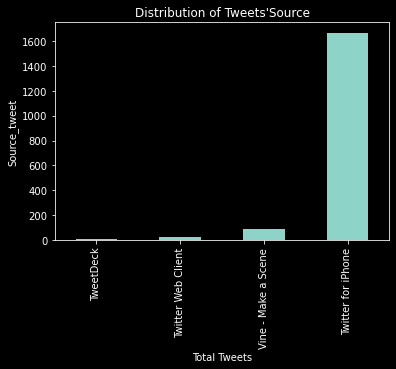

In [74]:
plt.title("Distribution of Tweets'Source")
master_viz.source.value_counts().sort_values().plot(kind ='bar')
plt.xlabel('Total Tweets')
plt.ylabel('Source_tweet');

most tweets are mostly done with the iphone

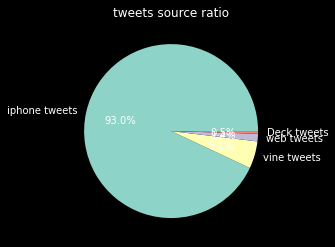

<Figure size 720x720 with 0 Axes>

In [75]:
iphone = (master_viz['source'] == 'Twitter for iPhone' ).sum() #patients boursier 
vine = (master_viz['source'] == 'Vine - Make a Scene').sum() # patients non boursier
web = (master_viz['source'] == 'Twitter Web Client').sum() # patients non boursier
Deck = (master_viz['source'] == 'TweetDeck').sum() # patients non boursier

value = [iphone, vine, web, Deck]
label = ('iphone tweets','vine tweets','web tweets','Deck tweets')

#visualisation
plt.pie(value, labels = label, autopct= '%.1f%%' )
plt.title('tweets source ratio')
plt.figure(figsize=(10,10))
plt.show()

the percentage of tweets per iphone is estimated at 93%

 **Most tweeted dog satde**

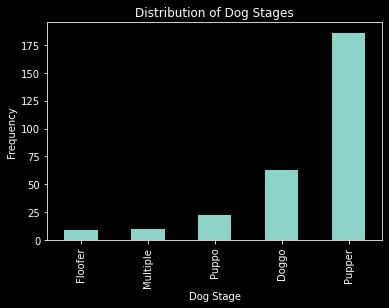

In [76]:
#Distribution of Dog Stages
master_viz.stage_of_dog.value_counts().sort_values().plot(kind='bar')
plt.title("Distribution of Dog Stages")
plt.xlabel('Dog Stage')
plt.ylabel('Frequency');


Here Pupper which is the pettit of the doggo is the most common dog stage in our dataset.  this may be the cause

**most common breed**


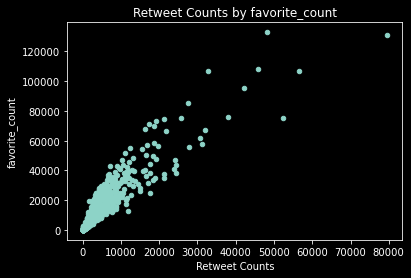

In [77]:
master_viz.plot(x='retweet_count', y='favorite_count', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('favorite_count')
plt.title('Retweet Counts by favorite_count')

fig = plt.gcf();

**Source tweets ratio**

there is a strongly positive correlation between the retweet_count variables and favorite_count

**Most breed prredict in algorithm 1**

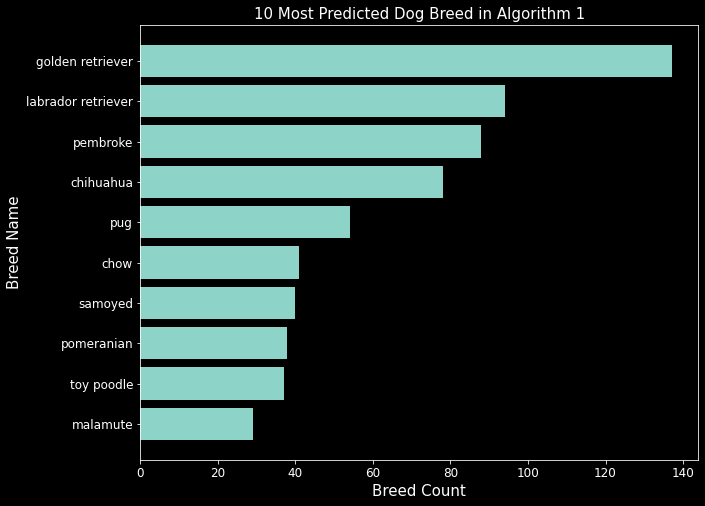

In [78]:
# dog breed series
algo1 = master_viz.p1.value_counts()
# 10 top dog breed
algo1 = algo1.head(10).sort_values()

# setting plot with size
fig = plt.figure(figsize=(10,8))

# plotting horizontal bar chart
plt.barh(algo1.index,algo1.values)

# setting labels and size
plt.title('10 Most Predicted Dog Breed in Algorithm 1',fontsize =15)
plt.xlabel('Breed Count',fontsize=15)
plt.ylabel('Breed Name', fontsize =15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# view plot
plt.show()

**Most breed prredict in algorithm 2**

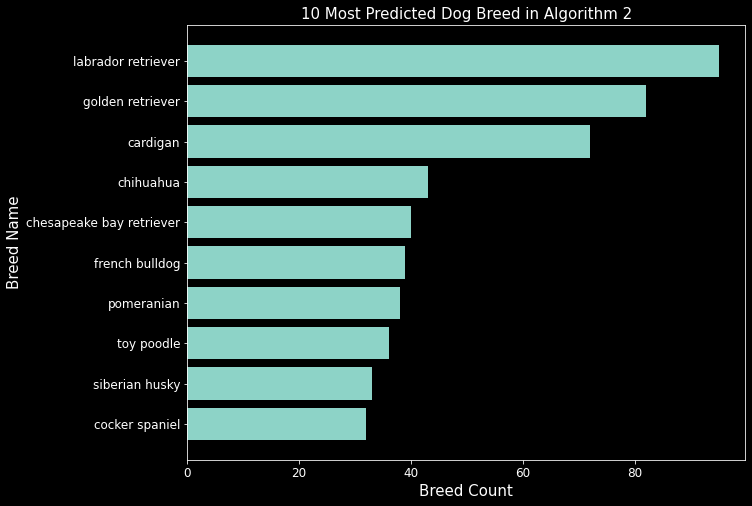

In [79]:
# dog breed series
algo2 = master_viz.p2.value_counts()
# 10 top dog breed
algo2 = algo2.head(10).sort_values()

# setting plot with size
fig = plt.figure(figsize=(10,8))

# plotting horizontal bar chart
plt.barh(algo2.index,algo2.values)

# setting labels and size
plt.title('10 Most Predicted Dog Breed in Algorithm 2',fontsize =15)
plt.xlabel('Breed Count',fontsize=15)
plt.ylabel('Breed Name', fontsize =15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# view plot
plt.show()

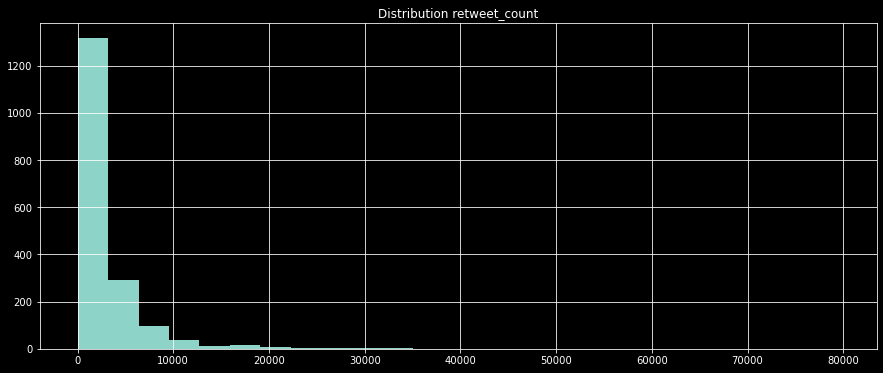

In [80]:
master_viz.retweet_count.hist(bins=25, figsize=(15,6))
plt.title('Distribution retweet_count')
plt.show();

In [81]:
#descriptive statistic with favorite_count

master_viz['favorite_count'].describe()

count      1792.000000
mean       9301.550223
std       12537.368716
min          81.000000
25%        2243.000000
50%        4494.000000
75%       11748.250000
max      132810.000000
Name: favorite_count, dtype: float64

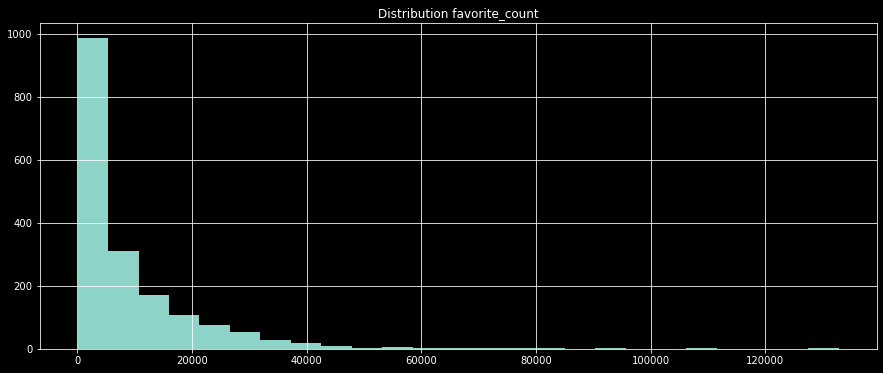

In [82]:
master_viz.favorite_count.hist(bins=25, figsize=(15,6))
plt.title('Distribution favorite_count')
plt.show();